In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [303]:
inpatient_charges = pd.read_csv('/Users/freyapatel/Downloads/inpatientCharges.csv')

In [304]:
inpatient_charges.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [305]:
inpatient_charges.shape

(163065, 12)

In [306]:
inpatient_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

### Convert Total Discharges, Avg Covered Charges and Avg Medicare Payments to integer type by getting rid of the '$' sign

In [307]:
inpatient_charges.columns = inpatient_charges.columns.str.strip()

In [308]:
inpatient_charges['DRG'] =inpatient_charges['DRG Definition'].str.extract(r'(\d+)')

In [309]:
colnames = ['Average Covered Charges','Average Total Payments','Average Medicare Payments']

In [310]:
#{'\$': ''}
def str_replace(df,colnames):
    for i in colnames:
        df[i] = df[i].replace({r'\$':''},regex = True)
        df[i] = pd.to_numeric(df[i])
    return df
str_replace(inpatient_charges, colnames)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,039
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,039
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,039
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,039
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39,948
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72,948
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36,948
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54,948


### Exploratory Data Analysis by State

The metrics below show aggregations of Average Coveree Charges, Total Dischages, Avg Medicare Payments and Number of Providers by State.

In [311]:
agg_metrics_state = inpatient_charges.groupby('Provider State').agg(
    Avg_Covered_Charges=('Average Covered Charges', 'mean'),
    Total_Discharges_Sum=('Total Discharges', 'sum'),
    Avg_Total_Payments = ('Average Total Payments','mean'),
    No_of_Providers = ('Provider Id','count')).reset_index()
    

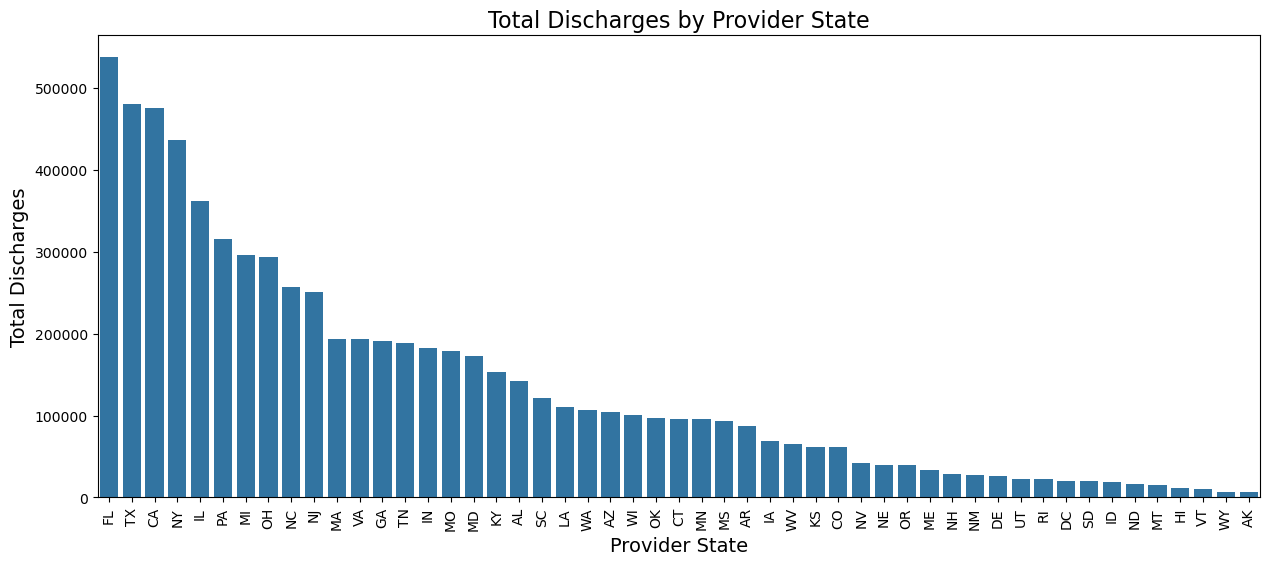

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

agg_metrics_disch_sorted = agg_metrics_state.sort_values(by='Total_Discharges_Sum', ascending=False)

ordered_states = agg_metrics_disch_sorted['Provider State'].tolist()

plt.figure(figsize=(15, 6))
sns.barplot(data=agg_metrics_disch_sorted, x='Provider State', y='Total_Discharges_Sum', order=ordered_states)

plt.title('Total Discharges by Provider State', fontsize=16)
plt.ylabel('Total Discharges', fontsize=14)
plt.xlabel('Provider State', fontsize=14)
plt.xticks(rotation=90)
plt.show()



Insights:
Arkansas has the least number of discharges by state, this could be due to a lack of providers in the state. On the other hand, Florida and Texas are the states with the highest number of discharges. It would also mean that these states also have a high number of providers. 

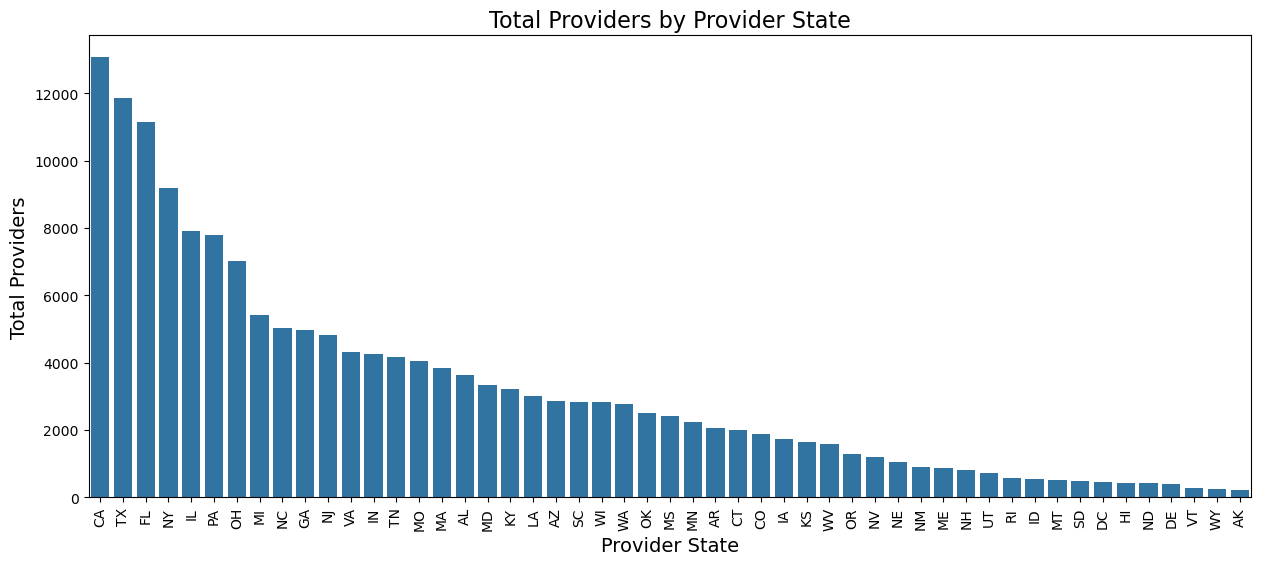

In [313]:
agg_metrics_state_sorted = agg_metrics_state.sort_values(by='No_of_Providers', ascending=False)

ordered_states = agg_metrics_state_sorted['Provider State'].tolist()

plt.figure(figsize=(15, 6))
sns.barplot(data=agg_metrics_state_sorted, x='Provider State', y='No_of_Providers', order=ordered_states)

# Customizing the plot
plt.title('Total Providers by Provider State', fontsize=16)
plt.ylabel('Total Providers', fontsize=14)
plt.xlabel('Provider State', fontsize=14)
plt.xticks(rotation=90)
plt.show()


And, as observed with total discharges, CA, TX and FL do have the highest number of providers while Arkansas has the least.These could be attributed to the fact that the states are densely populated and the number of providers and discharges further staggers off.

Text(0.5, 1.0, 'Average Covered Charges by State')

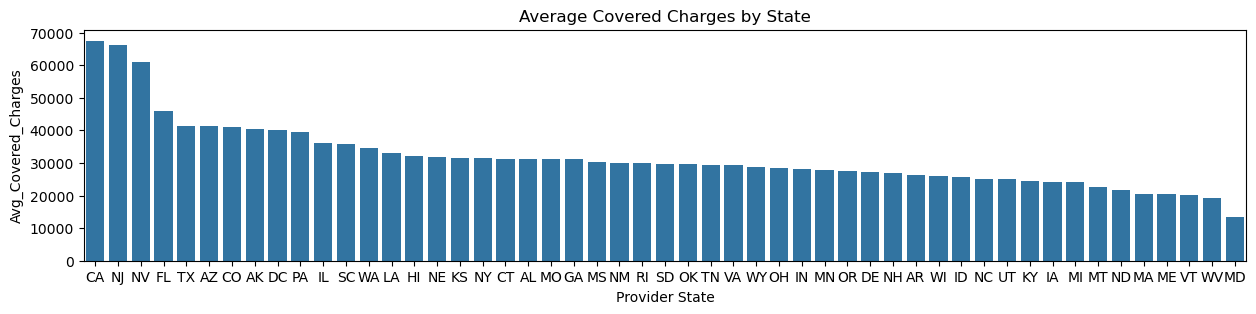

In [314]:
plt.figure(figsize = (15,3))
Charges_Covers = agg_metrics_state.sort_values(by = 'Avg_Covered_Charges',ascending = False)

sns.barplot(data = Charges_Covers, x='Provider State', y='Avg_Covered_Charges',legend = False)
plt.title('Average Covered Charges by State')

The average covered charges peak at 60K-70K in California and falls to lesser than 20K in MD and WV.

Text(0.5, 1.0, 'Average Medicare Payments')

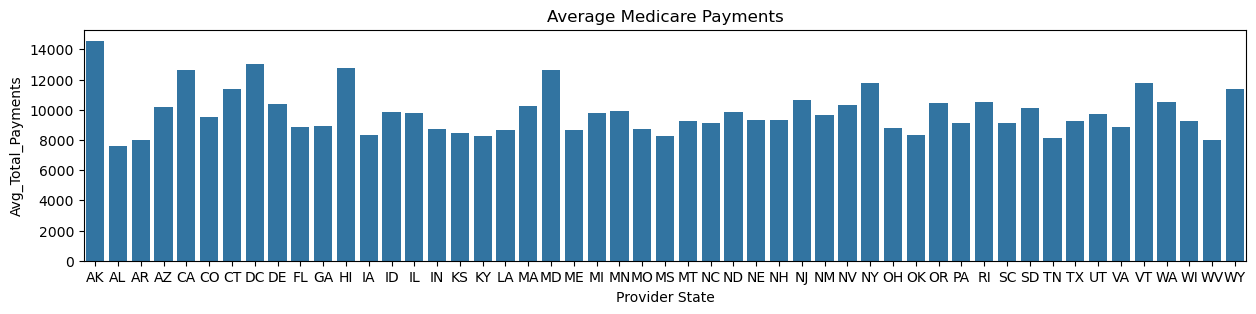

In [315]:
plt.figure(figsize = (15,3))
sns.barplot(data = agg_metrics_state, x='Provider State', y='Avg_Total_Payments',legend = False)
plt.title('Average Medicare Payments')

In [316]:
DRG_count = inpatient_charges.groupby(['DRG'])['Total Discharges'].sum().reset_index()
DRG_count.head()
DRG_count.columns = ['DRG','DRG_count']

In [317]:
DRG_count = pd.DataFrame(DRG_count)

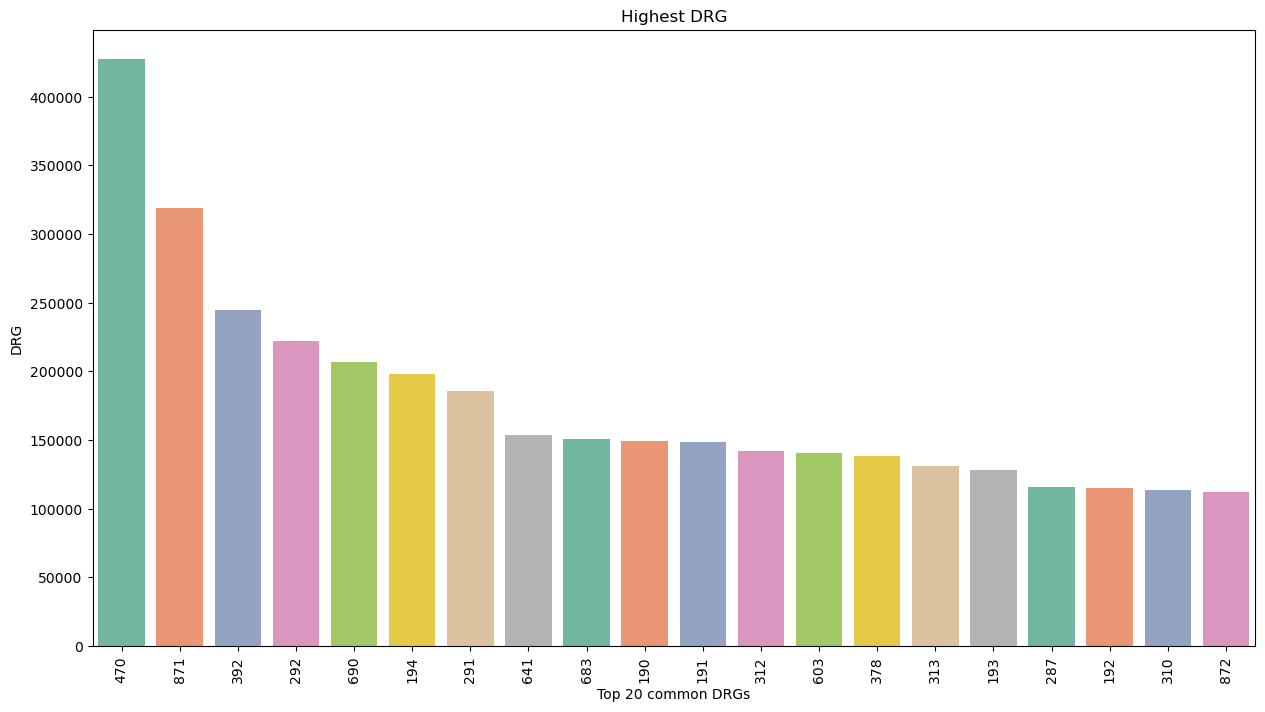

In [318]:
plt.figure(figsize = (15,8))

DRG_sort = DRG_count.sort_values(by = 'DRG_count',ascending = False).head(20)
sns.barplot(data=DRG_sort, x='DRG', y='DRG_count',hue = 'DRG',palette = 'Set2')
plt.title('Highest DRG')
plt.ylabel('DRG')
plt.xlabel('Top 20 common DRGs')
plt.xticks(rotation = 90)
plt.show()

In [319]:

DRG_count_state = inpatient_charges.groupby(['DRG','Provider State'])['Total Discharges'].sum().reset_index()
DRG_count_state.head()
DRG_count_state.columns = ['DRG','Provider State','DRG_count']

In [320]:

DRG_count_state = DRG_count_state.loc[DRG_count_state.groupby('Provider State')['DRG_count'].idxmax()]

In [321]:
DRG_count_state

,DRG,Provider State,DRG_count
3414,470,AK,648
3415,470,AL,8411
3416,470,AR,5441
3417,470,AZ,8943
4675,871,CA,34284
3419,470,CO,6991
3420,470,CT,5324
3421,470,DC,1013
3422,470,DE,1817
3423,470,FL,29985


In [322]:
DRG_count_state = pd.DataFrame(DRG_count_state)

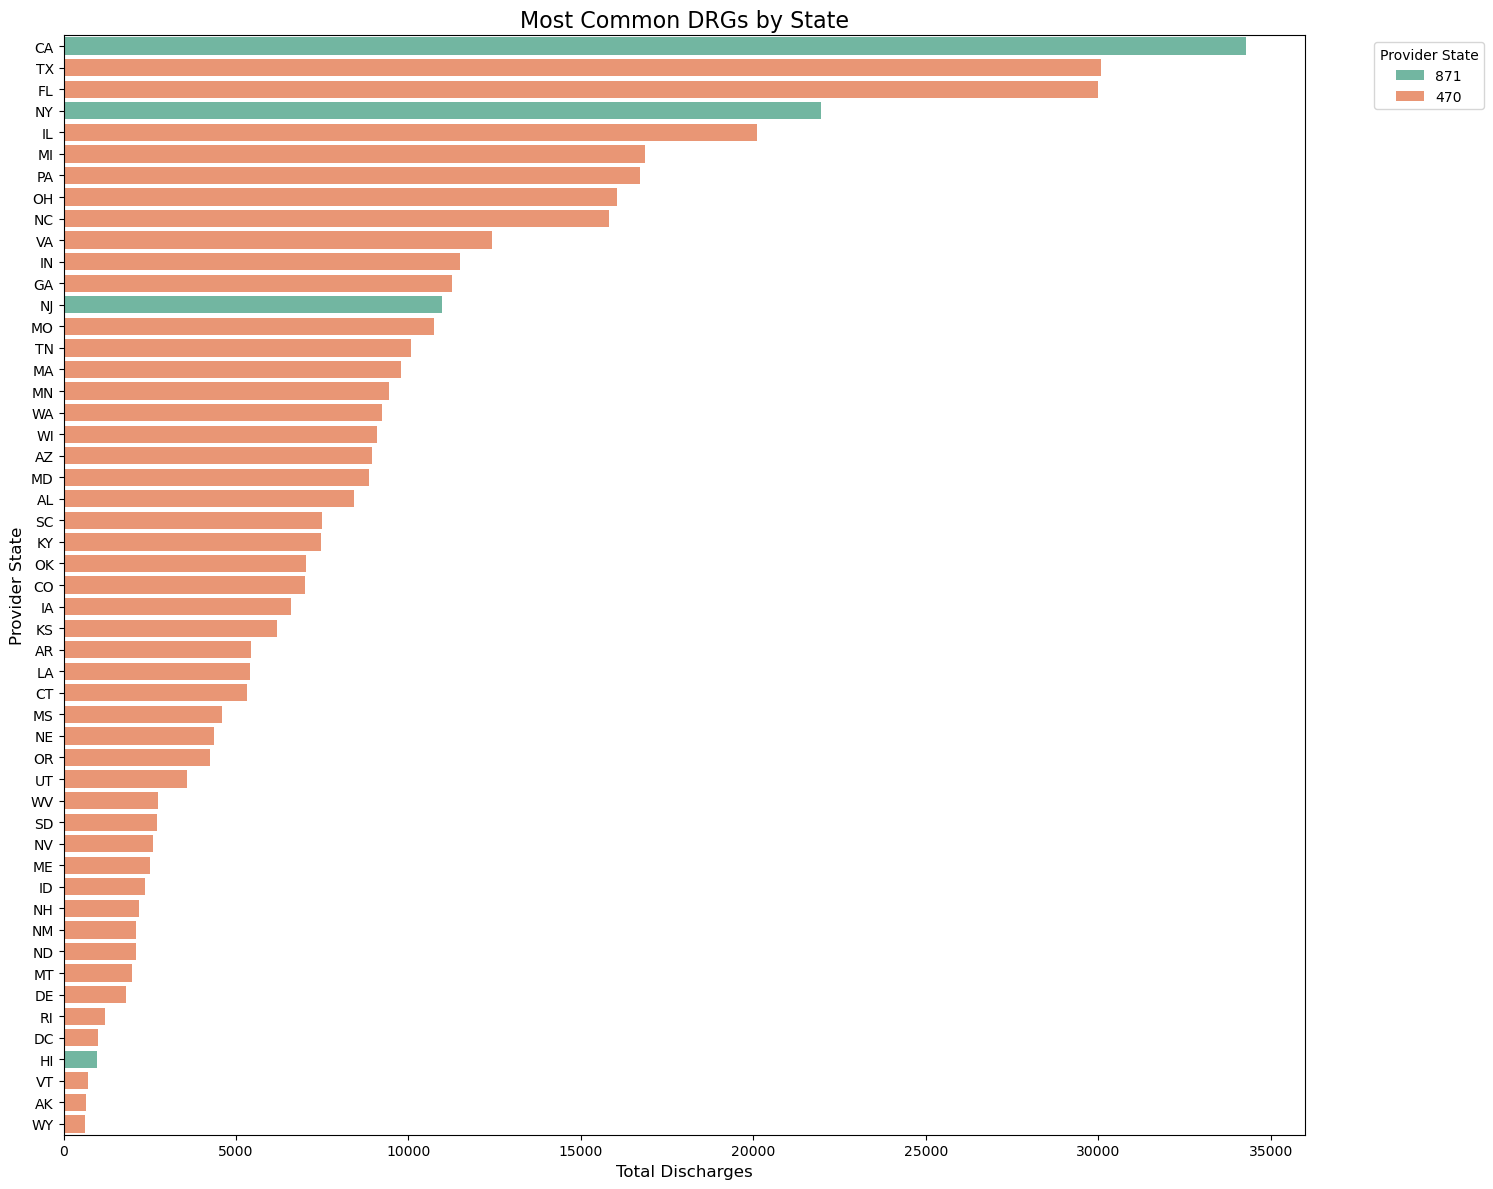

In [323]:
plt.figure(figsize=(15, 12))
DRG_count_state_sort = DRG_count_state.sort_values(by='DRG_count', ascending=False)
sns.barplot(data=DRG_count_state_sort, y='Provider State', x='DRG_count', hue='DRG', palette='Set2')

plt.title('Most Common DRGs by State', fontsize=16)
plt.xlabel('Total Discharges', fontsize=12)
plt.ylabel('Provider State', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Provider State')

plt.tight_layout()
plt.show()


Out of all states, 470 is the most common DRG, followed by 871 in the larges provider state CA. This means that most providers are prominent for DRG 871. 

In [324]:
inpatient_charges.groupby('DRG').nunique()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
DRG,,,,,,,,,,,,
039,1,1079,1052,1078,736,51,1031,301,93,1079,1073,1075
057,1,1201,1165,1200,790,51,1138,268,79,1199,1198,1200
064,1,1659,1599,1656,1064,51,1566,304,143,1658,1658,1656
065,1,2269,2179,2263,1436,51,2141,306,176,2269,2259,2263
066,1,1806,1735,1803,1187,51,1721,305,104,1806,1796,1799
...,...,...,...,...,...,...,...,...,...,...,...,...
885,1,613,604,613,460,49,584,230,273,613,612,613
897,1,906,883,904,631,51,869,261,118,905,903,903
917,1,843,824,841,581,50,816,263,49,842,843,843


100 rows means that the dataset accounts for 100 unique DRGs.

### DRG Count v/s Cost. 
This would help us find the top 20 most expensive procedures out of the 100 we are analyzing. This would help in identifying upcoding practices by a state.

In [325]:
agg_metrics_providers_DRG = inpatient_charges.groupby(['DRG']).agg(
    DRG_Cost=('Average Total Payments', 'mean')
).reset_index().sort_values(by = 'DRG_Cost', ascending = False)

In [326]:
top20_drg = agg_metrics_providers_DRG.head(20)

In [327]:
top20_drg 

,DRG,DRG_Cost
92,870,44259.485463
91,853,40315.961432
21,207,38588.920997
52,329,37765.594295
66,460,27778.671119
26,246,23326.339019
30,252,22845.639314
67,469,22531.261513
23,238,21948.545104
70,480,20984.366652


/var/folders/ww/xgp1970s4lx6dkr440hn2b_40000gn/T/ipykernel_1297/3634792253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DRG', y='DRG_Cost', data=top20_drg, palette='viridis')


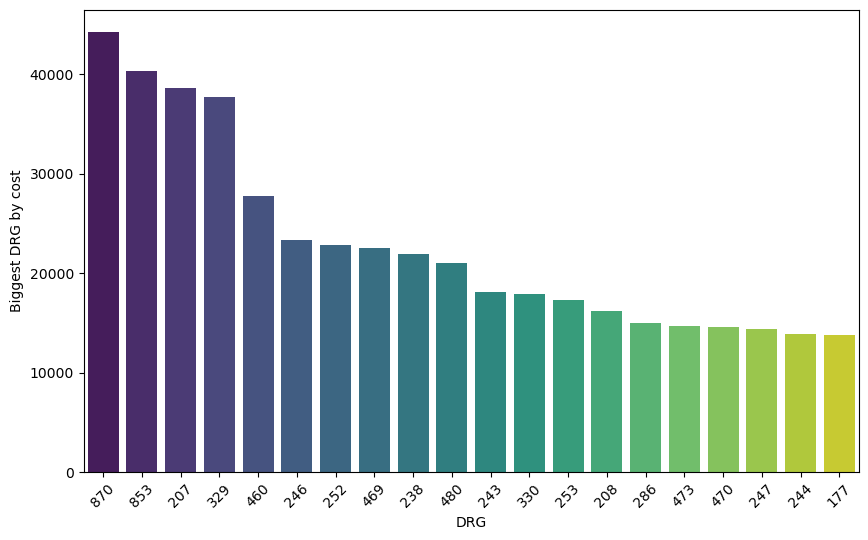

In [328]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DRG', y='DRG_Cost', data=top20_drg, palette='viridis')

# Set labels and title
plt.xlabel('DRG')
plt.ylabel('Biggest DRG by cost')

# Display the plot
plt.xticks(rotation=45)
plt.show()


Here, we see that only number 470 is the most common DRG and ranks at #17 in the most common DRG's by state. Furthermore, the states with this DRG do not have as many patient discharges and are relatively small. This could mean that the procedure is not a common one as it gets flagged only in relatively less densely populated states.

### Here, I wish to see the distribution of providers by discharges

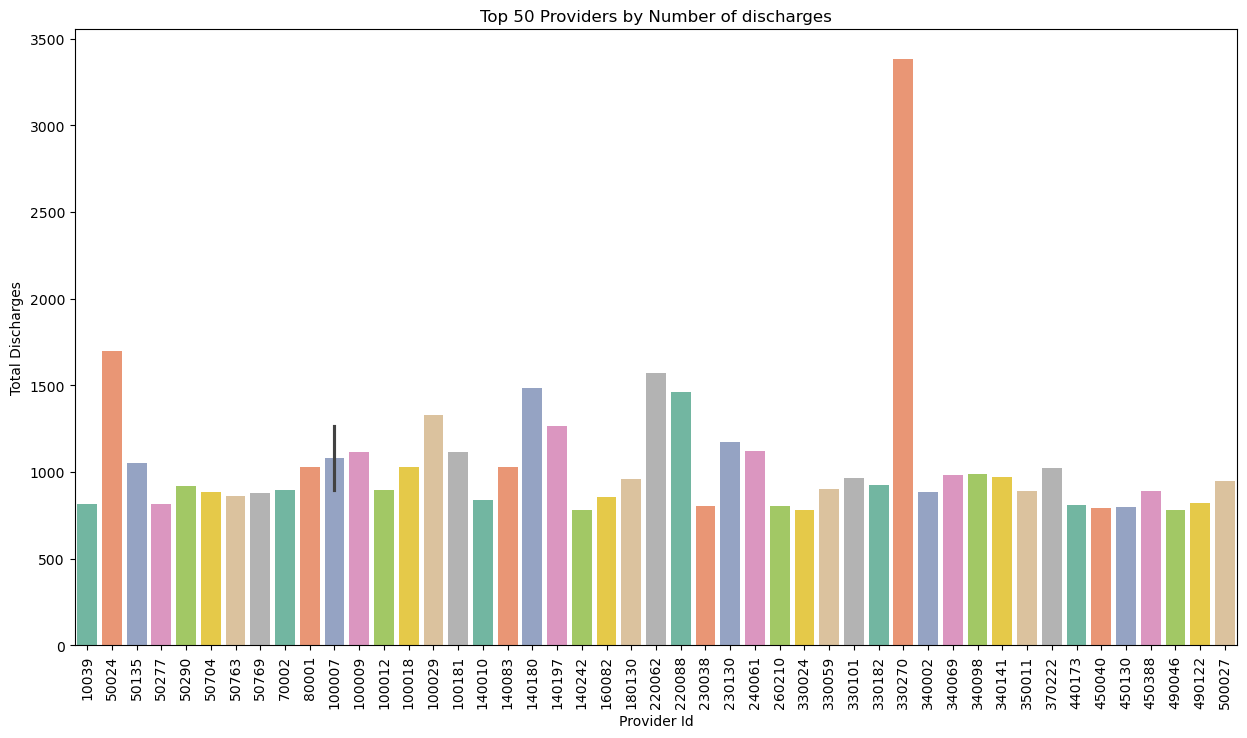

In [329]:

inpatient_charges = inpatient_charges.sort_values(by = 'Total Discharges', ascending = False)

top_disch = inpatient_charges.head(50)

plt.figure(figsize=(15, 8))
  
sns.barplot(data = top_disch,x = 'Provider Id', y ='Total Discharges', hue = 'Provider Id',
            palette = "Set2", legend = False)

# Adding labels and title
plt.xticks(rotation=90)
plt.ylabel('Total Discharges')
plt.xlabel('Provider Id')
plt.title('Top 50 Providers by Number of discharges')
plt.show()


### The above graph shows top providers by counts. 
The graph is pretty skewed in that, 330270 has 3500 discharges and then the numbers fall to 2000. This could be an outlier in the data and could require investigation as to how one hospital accounts for atleast twice the number of discharges than the remaining hospitals.

# Metric used for benchmarking: Total Payments Provided
The aggregations on this metric are used to compare the cost for each DRG at different levels.

### 1. Based on cost of procedure, I want to create a benchmark that averages that cost of each procedure (payments provided). 
The feature would be the difference between the difference between the average payment received by a provider for a procedure and the benchmark. The aggregation below is a national average.

In the context of predictive modeling (e.g., fraud detection, cost analysis), this feature can help identify whether a provider is charging unusually high or low compared to the benchmark, which can be a useful input in anomaly detection or clustering algorithms.

In [330]:
df1 = inpatient_charges

In [331]:
benchmark_payments_DRG = df1.groupby(['DRG'])['Average Total Payments'].mean().reset_index()

In [332]:
benchmark_payments_DRG.columns = ['DRG','Avg_DRG_Payments']
benchmark_payments_DRG.head()

,DRG,Avg_DRG_Payments
0,039,6960.534004
1,057,6706.276445
2,064,13263.823032
3,065,7922.671141
4,066,5713.985221


In [333]:
df1 = df1.merge(benchmark_payments_DRG, how='left', on='DRG')

In [334]:
df1['DRG_Payments_difference'] = df1['Avg_DRG_Payments'] - df1['Average Total Payments'] 

In [335]:
df1.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG,Avg_DRG_Payments,DRG_Payments_difference
0,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,53113.58,19023.70,14880.39,470,14566.929215,-4456.770785
1,885 - PSYCHOSES,50024,PARADISE VALLEY HOSPITAL,2400 EAST FOURTH STREET,NATIONAL CITY,CA,91950,CA - San Diego,1696,33469.03,8192.84,7420.41,885,6968.721876,-1224.118124
2,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,220062,ADCARE HOSPITAL OF WORCESTER INC,107 LINCOLN STREET,WORCESTER,MA,1605,MA - Worcester,1571,4227.46,4967.56,4284.52,897,4949.907307,-17.652693
3,885 - PSYCHOSES,140180,ST MARY & ELIZABETH MED CTR-DIVISION CAMPUS,2233 W DIVISION ST,CHICAGO,IL,60622,IL - Chicago,1487,20178.43,8165.69,7368.63,885,6968.721876,-1196.968124
4,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,220088,NEW ENGLAND BAPTIST HOSPITAL,125 PARKER HILL AVENUE,BOSTON,MA,2120,MA - Boston,1464,23190.34,13934.44,12857.35,470,14566.929215,632.489215


### 2. Ratio of Average Medicare Payments & Average Total Payments
In this feature, I want to compare the ratio of medicare payments and total payments averaged over each DRG (benchmark), with the avg medicare & total payment for each DRG & Provider, city combination. The ratios are compared as percentage differences. Thus, a difference higher than 15% from the computed ratio (benchmark) couldbe considered an anomaly. Setting such thresholds would require extensive domain knowledge

In [336]:
benchmark_medicare_DRG = df1.groupby(['DRG'])['Average Medicare Payments'].mean().reset_index()

In [337]:
benchmark_medicare_DRG.columns = ['DRG','Avg_Medicare_Payments']
benchmark_medicare_DRG.head()

,DRG,Avg_Medicare_Payments
0,039,5555.837525
1,057,5701.676570
2,064,12112.849445
3,065,6781.501785
4,066,4469.203560


In [338]:
df1 = df1.merge(benchmark_medicare_DRG, how='left', on='DRG')

In [339]:
df1['DRG_Medicare_Payment_Ratio'] = df1['Avg_Medicare_Payments']/df1['Avg_DRG_Payments'] 

In [340]:
df1.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG,Avg_DRG_Payments,DRG_Payments_difference,Avg_Medicare_Payments,DRG_Medicare_Payment_Ratio
0,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,53113.58,19023.70,14880.39,470,14566.929215,-4456.770785,12464.623622,0.855680
1,885 - PSYCHOSES,50024,PARADISE VALLEY HOSPITAL,2400 EAST FOURTH STREET,NATIONAL CITY,CA,91950,CA - San Diego,1696,33469.03,8192.84,7420.41,885,6968.721876,-1224.118124,5864.125644,0.841492
2,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,220062,ADCARE HOSPITAL OF WORCESTER INC,107 LINCOLN STREET,WORCESTER,MA,1605,MA - Worcester,1571,4227.46,4967.56,4284.52,897,4949.907307,-17.652693,3999.917704,0.808079
3,885 - PSYCHOSES,140180,ST MARY & ELIZABETH MED CTR-DIVISION CAMPUS,2233 W DIVISION ST,CHICAGO,IL,60622,IL - Chicago,1487,20178.43,8165.69,7368.63,885,6968.721876,-1196.968124,5864.125644,0.841492
4,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,220088,NEW ENGLAND BAPTIST HOSPITAL,125 PARKER HILL AVENUE,BOSTON,MA,2120,MA - Boston,1464,23190.34,13934.44,12857.35,470,14566.929215,632.489215,12464.623622,0.855680


In [341]:
df1['DRG_Med_Payment_Original_Ratio'] = df1['Average Medicare Payments']/df1['Average Total Payments']

In [342]:
df1.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG,Avg_DRG_Payments,DRG_Payments_difference,Avg_Medicare_Payments,DRG_Medicare_Payment_Ratio,DRG_Med_Payment_Original_Ratio
0,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,53113.58,19023.70,14880.39,470,14566.929215,-4456.770785,12464.623622,0.855680,0.782203
1,885 - PSYCHOSES,50024,PARADISE VALLEY HOSPITAL,2400 EAST FOURTH STREET,NATIONAL CITY,CA,91950,CA - San Diego,1696,33469.03,8192.84,7420.41,885,6968.721876,-1224.118124,5864.125644,0.841492,0.905719
2,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,220062,ADCARE HOSPITAL OF WORCESTER INC,107 LINCOLN STREET,WORCESTER,MA,1605,MA - Worcester,1571,4227.46,4967.56,4284.52,897,4949.907307,-17.652693,3999.917704,0.808079,0.862500
3,885 - PSYCHOSES,140180,ST MARY & ELIZABETH MED CTR-DIVISION CAMPUS,2233 W DIVISION ST,CHICAGO,IL,60622,IL - Chicago,1487,20178.43,8165.69,7368.63,885,6968.721876,-1196.968124,5864.125644,0.841492,0.902389
4,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,220088,NEW ENGLAND BAPTIST HOSPITAL,125 PARKER HILL AVENUE,BOSTON,MA,2120,MA - Boston,1464,23190.34,13934.44,12857.35,470,14566.929215,632.489215,12464.623622,0.855680,0.922703


In [343]:
df1['Medicare_Total_Payment_diff'] = ((df1['DRG_Med_Payment_Original_Ratio'] - df1['DRG_Medicare_Payment_Ratio'] )/ df1['DRG_Medicare_Payment_Ratio'])*100

In [344]:
df1.sort_values(by = 'Medicare_Total_Payment_diff',ascending = False)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG,Avg_DRG_Payments,DRG_Payments_difference,Avg_Medicare_Payments,DRG_Medicare_Payment_Ratio,DRG_Med_Payment_Original_Ratio,Medicare_Total_Payment_diff
161842,310 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDER...,330199,METROPOLITAN HOSPITAL CENTER,1901 FIRST AVENUE,NEW YORK,NY,10029,NY - Manhattan,11,6350.63,8204.81,7693.18,310,3967.388115,-4237.421885,2876.015593,0.724914,0.937643,29.345349
104246,203 - BRONCHITIS & ASTHMA W/O CC/MCC,150056,INDIANA UNIVERSITY HEALTH,1701 N SENATE BLVD,INDIANAPOLIS,IN,46206,IN - Indianapolis,21,15974.61,5434.66,5006.47,203,4389.910134,-1044.749866,3159.012081,0.719607,0.921211,28.015802
160425,203 - BRONCHITIS & ASTHMA W/O CC/MCC,330201,KINGSBROOK JEWISH MEDICAL CENTER,585 SCHENECTADY AVENUE,BROOKLYN,NY,11203,NY - Manhattan,11,21387.72,6182.45,5670.81,203,4389.910134,-1792.539866,3159.012081,0.719607,0.917243,27.464377
154871,203 - BRONCHITIS & ASTHMA W/O CC/MCC,330199,METROPOLITAN HOSPITAL CENTER,1901 FIRST AVENUE,NEW YORK,NY,10029,NY - Manhattan,12,8375.75,8949.91,8208.58,203,4389.910134,-4559.999866,3159.012081,0.719607,0.917169,27.454071
160033,203 - BRONCHITIS & ASTHMA W/O CC/MCC,50089,COMMUNITY HOSPITAL OF SAN BERNARDINO,1805 MEDICAL CENTER DRIVE,SAN BERNARDINO,CA,92411,CA - San Bernardino,11,34804.72,6133.00,5618.45,203,4389.910134,-1743.089866,3159.012081,0.719607,0.916101,27.305715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103964,313 - CHEST PAIN,190027,CHRISTUS ST PATRICK HOSPITAL,524 DR MICHAEL DEBAKEY STREET,LAKE CHARLES,LA,70601,LA - Lake Charles,21,20317.85,9180.28,1400.57,313,3912.283709,-5267.996291,2879.106906,0.735915,0.152563,-79.268943
8543,247 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...,430095,AVERA HEART HOSPITAL OF SOUTH DAKOTA LLC,4500 W 69TH ST,SIOUX FALLS,SD,57108,SD - Sioux Falls,121,43844.23,83484.14,9316.11,247,14353.519659,-69130.620341,11770.997940,0.820077,0.111591,-86.392581
5922,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,390096,ST JOSEPH MEDICAL CENTER,2500 BERNVILLE ROAD,READING,PA,19605,PA - Reading,143,24542.94,72797.93,7718.09,189,9056.326570,-63741.603430,8033.134580,0.887019,0.106021,-88.047525
92922,249 - PERC CARDIOVASC PROC W NON-DRUG-ELUTING ...,500051,OVERLAKE HOSPITAL MEDICAL CENTER,1035-116TH AVE NE,BELLEVUE,WA,98004,WA - Seattle,23,44499.00,84499.26,8500.60,249,12593.510618,-71905.749382,10621.455466,0.843407,0.100600,-88.072225


### 3. Next, we create a benchmark for DRG wise total payment aggreagtions by State
The feature: Difference of avg DRG payments and Total Payments. Similar to the first one, this is a state wise aggregation and in the context of predictive modeling (e.g., fraud detection, cost analysis), this feature can help identify whether a provider is charging unusually high or low compared to the benchmark, which can be a useful input in anomaly detection or clustering algorithms.

In [345]:
benchmark_payments_DRG_state = df1.groupby(['DRG','Provider State'])['Average Total Payments'].mean().reset_index()

In [346]:
benchmark_payments_DRG_state.columns = ['DRG','Provider State','Avg_DRG_Payments_state']
benchmark_payments_DRG_state.head()

,DRG,Provider State,Avg_DRG_Payments_state
0,039,AK,8401.950000
1,039,AL,5743.611739
2,039,AR,6118.828750
3,039,AZ,7271.555833
4,039,CA,8387.932687


In [347]:
df1 = df1.merge(benchmark_payments_DRG_state, how='left', on=['DRG','Provider State'])

In [348]:
df1['DRG_State_Payments_difference'] = df1['Avg_DRG_Payments_state'] - df1['Average Total Payments'] 

### 4. Average Total Payments-Average Medicare Payments (state)
Here, we average the total payments and medicare payments by each code and state. The benchmark differences are compared to the actual differences using percentage differences. 

Feature: Percentage difference between actual beneficiary payment and average. 

Predictive potential: If the difference is by 20% then, the actual payment by a beneficiary for a DRG is 20% higher than average. From a fraud detection perspective, this can help identify strategic bundling or fraudulent overcharging practices.

In [349]:
benchmark_payments_DRG_state.head()

,DRG,Provider State,Avg_DRG_Payments_state
0,039,AK,8401.950000
1,039,AL,5743.611739
2,039,AR,6118.828750
3,039,AZ,7271.555833
4,039,CA,8387.932687


In [350]:
Medicare_Payment_State_Avg = df1.groupby(['DRG','Provider State'])['Average Medicare Payments'].mean().reset_index()
Medicare_Payment_State_Avg.columns = ['DRG','Provider State','Medicare_Avg_State']

In [351]:
df1 = df1.merge(Medicare_Payment_State_Avg,on = ['DRG','Provider State'], how = 'left')

In [352]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8   Total Discharges                      163065 non-null  int64  
 9   Average Covered Charges               163065 non-null  float64
 10  Average Total Payments                163065 non-null  float64
 11  

In [353]:
df1['Payments_Beneficiary_benchmark'] = df1['Avg_DRG_Payments_state'] - df1['Medicare_Avg_State']

In [354]:
df1['Payments_diff_actual'] = df1['Average Total Payments'] - df1['Average Medicare Payments']

In [355]:
df1['State_Payment_diff']= (df1['Payments_diff_actual']- df1['Payments_Beneficiary_benchmark'] )/df1['Payments_Beneficiary_benchmark'] * 100 

### 5. Average Total Payments-Average Medicare Payments (city)
Similar, to a state level aggregation. Deciding a city level threshold would help compare providers to similar ones in a city. This way, similar lifestyle choices or similar habits are kept in mind

Feature: Percentage difference between actual beneficiary payment and average (city level)

In [356]:

benchmark_payments_DRG_city = df1.groupby(['DRG','Provider City'])['Average Total Payments'].mean().reset_index()

In [357]:

benchmark_payments_DRG_city.columns = ['DRG','Provider City','Total_Payments_Avg_City']
df1 = df1.merge(benchmark_payments_DRG_city,on = ['DRG','Provider City'], how = 'left')


In [358]:

benchmark_medicare_payments_DRG_city = df1.groupby(['DRG','Provider City'])['Average Medicare Payments'].mean().reset_index()
benchmark_medicare_payments_DRG_city.columns = ['DRG','Provider City','Avg_City_Medicare']
df1 = df1.merge(benchmark_medicare_payments_DRG_city,on = ['DRG','Provider City'], how = 'left')

In [359]:
df1['Payments_Beneficiary_benchmark_city'] = df1['Total_Payments_Avg_City'] - df1['Avg_City_Medicare']
df1['Payments_diff_city'] =  (df1['Payments_diff_actual']- df1['Payments_Beneficiary_benchmark_city'] )/df1['Payments_Beneficiary_benchmark_city'] * 100 

### Covered Charges Calculations
This section covers all aggregations involving the variable covered charges

### 6. Ratio of Median Covered Charges by State and Actual Covered Charges
Median is less prone to being affected by outliers and noise. This way, the benchmark is not skewed by extreme outliers or fraudulent billing practices. 
The feature here would the difference ratio of Average Covered Charges for each provider, DRG combination to Median Covered Charges for each provider & DRG combination. A ratio higher than 1 would mean that the covered charges for a DRG at a provider may suggest fraudulent billing techniques using insurance loopholes

In [360]:
Median_Covered_Charges_State = df1.groupby(['DRG','Provider State'])['Average Covered Charges'].median().reset_index()
Median_Covered_Charges_State.columns = ['DRG','Provider State','Median Covered Charges']

In [361]:
df1 = df1.merge(Median_Covered_Charges_State,on = ['DRG','Provider State'], how = 'left')

In [362]:
df1['Ratio Covered Charges State Median'] = df1['Average Covered Charges']/df1['Median Covered Charges']

In [363]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 31 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8   Total Discharges                      163065 non-null  int64  
 9   Average Covered Charges               163065 non-null  float64
 10  Average Total Payments                163065 non-null  float64
 11  

### 7. Difference between Average Covered Charges by a hospital referral region by DRG and Average Covered Charges per provider.
This helps is comparing the Covered Charges for a treamment with similar providers in the region. A z-score helps to understand how far a particular value is from the mean Average Covered Charges by Region, expressed in terms of standard deviations. What it detects: Unusual billing practices by a provider. For instances, higher billing than region average. Consistently high Z-Scores could indicate anomalies.

In [364]:
Covered_Charges_Ref_Region = df1.groupby(['Hospital Referral Region Description','DRG'])['Average Covered Charges'].mean().reset_index()
Covered_Charges_Ref_Region.columns = ['Hospital Referral Region Description','DRG','Avg_Covered_Charges_Region']

df1 = df1.merge(Covered_Charges_Ref_Region,on = ['Hospital Referral Region Description','DRG'], how = 'left')

df1.columns

Covered_Charges_Ref_Region_std = df1.groupby(['Hospital Referral Region Description','DRG'])['Average Covered Charges'].std().reset_index()
Covered_Charges_Ref_Region_std.columns = ['Hospital Referral Region Description','DRG','Std_Covered_Charges_Region']

df1 = df1.merge(Covered_Charges_Ref_Region_std,on = ['Hospital Referral Region Description','DRG'], how = 'left')

df1['Z_Score_Region_Covered']=(df1['Average Covered Charges']-df1['Avg_Covered_Charges_Region'])/df1['Std_Covered_Charges_Region']

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 34 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8   Total Discharges                      163065 non-null  int64  
 9   Average Covered Charges               163065 non-null  float64
 10  Average Total Payments                163065 non-null  float64
 11  

### 8. Feature: Percentage difference between benchmark ratio of covered charges to total payments & actual ratio of covered charges to total payments.  

A large positive or negative percentage indicates a significant deviation from expected behavior. This can highlight outliers—providers that are either charging significantly more or receiving significantly less than their peers. 

If the ratio is significantly high it could mean :
The provider may be consistently billing more than what is considered typical or acceptable for the services provided.

In [365]:
total_payments_region = df1.groupby(['DRG', 'Hospital Referral Region Description'])['Average Total Payments'].mean().reset_index()
total_payments_region.columns = ['DRG', 'Hospital Referral Region Description', 'Avg_Total_Payments_Region']

df1 = df1.merge(total_payments_region, on=['DRG', 'Hospital Referral Region Description'], how='left')
#df1 = df1.merge(benchmark_covered_charges_drg_region, on=['DRG', 'Hospital Referral Region Description'], how='left')


df1['Payments_Charges_Region_Ratio'] = df1['Avg_Covered_Charges_Region'] / df1['Avg_Total_Payments_Region']

df1['Charges_Payments_Diff_Actual'] = df1['Average Covered Charges'] / df1['Average Total Payments']

df1['Region_Payment_Diff_Percent'] = (df1['Charges_Payments_Diff_Actual'] - df1['Payments_Charges_Region_Ratio']) / df1['Payments_Charges_Region_Ratio'] * 100

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 38 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8   Total Discharges                      163065 non-null  int64  
 9   Average Covered Charges               163065 non-null  float64
 10  Average Total Payments                163065 non-null  float64
 11  

## Discharges benchmarking

### 9 Ratio of Average Discharges and National Average Discharges 
Aggregation level: National
This helps in comparing each providers DRG wise discharges to national averages. A high ratio would mean an anomaly and could indicate ubundling. 

In [366]:
benchmark_DRG_counts_national = df1.groupby(['DRG'])['Total Discharges'].mean().reset_index()

In [367]:
benchmark_DRG_counts_national.columns = ['DRG','Avg Discharges National']

In [368]:
df1 = df1.merge(benchmark_DRG_counts_national,on = ['DRG'], how = 'left')

In [369]:
df1['Ratio_Discharges_to_National'] = df1['Total Discharges']/df1['Avg Discharges National']

In [370]:
df1.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Ratio Covered Charges State Median,Avg_Covered_Charges_Region,Std_Covered_Charges_Region,Z_Score_Region_Covered,Avg_Total_Payments_Region,Payments_Charges_Region_Ratio,Charges_Payments_Diff_Actual,Region_Payment_Diff_Percent,Avg Discharges National,Ratio_Discharges_to_National
0,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,53113.58,...,1.421781,50582.846500,18065.344193,0.140088,22709.351000,2.227402,2.791969,25.346452,155.348000,21.776914
1,885 - PSYCHOSES,50024,PARADISE VALLEY HOSPITAL,2400 EAST FOURTH STREET,NATIONAL CITY,CA,91950,CA - San Diego,1696,33469.03,...,1.197773,31001.070000,8385.113314,0.294326,7294.877500,4.249704,4.085156,-3.871986,146.383361,11.586016
2,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,220062,ADCARE HOSPITAL OF WORCESTER INC,107 LINCOLN STREET,WORCESTER,MA,1605,MA - Worcester,1571,4227.46,...,0.396626,11828.608333,7012.271027,-1.083978,5298.505000,2.232443,0.851013,-61.879720,35.248344,44.569469
3,885 - PSYCHOSES,140180,ST MARY & ELIZABETH MED CTR-DIVISION CAMPUS,2233 W DIVISION ST,CHICAGO,IL,60622,IL - Chicago,1487,20178.43,...,1.269136,15704.254545,6263.841268,0.714286,8653.092727,1.814872,2.471124,36.159678,146.383361,10.158258
4,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,220088,NEW ENGLAND BAPTIST HOSPITAL,125 PARKER HILL AVENUE,BOSTON,MA,2120,MA - Boston,1464,23190.34,...,0.729088,32957.344750,10009.865557,-0.975738,16081.945250,2.049338,1.664246,-18.791038,155.348000,9.424003


### 10. Possible Upcoding
The ratio of these two would give the proportion of discharges for a specific DRG within a provider. This proportion tells us how much of the total discharges for each provider is attributed to each specific DRG.
If a DRG makes up a high proportion of a provider's then it could be cause for investigation-especially if the service is high revenue. The hospital could be strategically monetizing on that service through upcoding.

In [371]:
provider_drg_discharge = df1.groupby(['Provider Id'])['Total Discharges'].sum().reset_index()

In [372]:
provider_drg_discharge.columns = ['Provider Id','Total Discharges by Provider']

In [373]:
provider_drg_discharge

,Provider Id,Total Discharges by Provider
0,10001,5405
1,10005,1419
2,10006,3901
3,10007,603
4,10008,161
...,...,...
3332,670072,553
3333,670073,219
3334,670075,81
3335,670076,18


In [374]:
df1 = df1.merge(provider_drg_discharge,on = ['Provider Id'], how = 'left')

In [375]:
df1['DRG_Diversity'] = df1['Total Discharges']/df1['Total Discharges by Provider']

In [376]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 42 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8   Total Discharges                      163065 non-null  int64  
 9   Average Covered Charges               163065 non-null  float64
 10  Average Total Payments                163065 non-null  float64
 11  

### 11. The ratio of Discharges as compared to the state average for each DRG. The average is taken with each provider & DRG type
Just like national averages, this ratio could help detect unbundling practices by similar providers when constant high ratios are detected.

In [377]:

benchmark_DRG_counts_state = df1.groupby(['DRG','Provider State'])['Total Discharges'].mean().reset_index()

benchmark_DRG_counts_state

benchmark_DRG_counts_state.columns = ['DRG','Provider State','Average Discharges']

benchmark_DRG_counts_state

df1 = df1.merge(benchmark_DRG_counts_state, how='left', on=['DRG','Provider State'])

df1['Ratio DRG Discharges'] = df1['Total Discharges']/df1['Average Discharges']

df1.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Avg_Total_Payments_Region,Payments_Charges_Region_Ratio,Charges_Payments_Diff_Actual,Region_Payment_Diff_Percent,Avg Discharges National,Ratio_Discharges_to_National,Total Discharges by Provider,DRG_Diversity,Average Discharges,Ratio DRG Discharges
0,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,53113.58,...,22709.351000,2.227402,2.791969,25.346452,155.348000,21.776914,3956,0.855157,137.382979,24.624593
1,885 - PSYCHOSES,50024,PARADISE VALLEY HOSPITAL,2400 EAST FOURTH STREET,NATIONAL CITY,CA,91950,CA - San Diego,1696,33469.03,...,7294.877500,4.249704,4.085156,-3.871986,146.383361,11.586016,3150,0.538413,244.311111,6.941968
2,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,220062,ADCARE HOSPITAL OF WORCESTER INC,107 LINCOLN STREET,WORCESTER,MA,1605,MA - Worcester,1571,4227.46,...,5298.505000,2.232443,0.851013,-61.879720,35.248344,44.569469,1571,1.000000,68.045455,23.087508
3,885 - PSYCHOSES,140180,ST MARY & ELIZABETH MED CTR-DIVISION CAMPUS,2233 W DIVISION ST,CHICAGO,IL,60622,IL - Chicago,1487,20178.43,...,8653.092727,1.814872,2.471124,36.159678,146.383361,10.158258,4884,0.304464,232.394737,6.398596
4,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,220088,NEW ENGLAND BAPTIST HOSPITAL,125 PARKER HILL AVENUE,BOSTON,MA,2120,MA - Boston,1464,23190.34,...,16081.945250,2.049338,1.664246,-18.791038,155.348000,9.424003,1792,0.816964,174.660714,8.381965


In [378]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 44 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8   Total Discharges                      163065 non-null  int64  
 9   Average Covered Charges               163065 non-null  float64
 10  Average Total Payments                163065 non-null  float64
 11  

In [379]:
df1.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Avg_Total_Payments_Region,Payments_Charges_Region_Ratio,Charges_Payments_Diff_Actual,Region_Payment_Diff_Percent,Avg Discharges National,Ratio_Discharges_to_National,Total Discharges by Provider,DRG_Diversity,Average Discharges,Ratio DRG Discharges
0,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,53113.58,...,22709.351000,2.227402,2.791969,25.346452,155.348000,21.776914,3956,0.855157,137.382979,24.624593
1,885 - PSYCHOSES,50024,PARADISE VALLEY HOSPITAL,2400 EAST FOURTH STREET,NATIONAL CITY,CA,91950,CA - San Diego,1696,33469.03,...,7294.877500,4.249704,4.085156,-3.871986,146.383361,11.586016,3150,0.538413,244.311111,6.941968
2,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,220062,ADCARE HOSPITAL OF WORCESTER INC,107 LINCOLN STREET,WORCESTER,MA,1605,MA - Worcester,1571,4227.46,...,5298.505000,2.232443,0.851013,-61.879720,35.248344,44.569469,1571,1.000000,68.045455,23.087508
3,885 - PSYCHOSES,140180,ST MARY & ELIZABETH MED CTR-DIVISION CAMPUS,2233 W DIVISION ST,CHICAGO,IL,60622,IL - Chicago,1487,20178.43,...,8653.092727,1.814872,2.471124,36.159678,146.383361,10.158258,4884,0.304464,232.394737,6.398596
4,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,220088,NEW ENGLAND BAPTIST HOSPITAL,125 PARKER HILL AVENUE,BOSTON,MA,2120,MA - Boston,1464,23190.34,...,16081.945250,2.049338,1.664246,-18.791038,155.348000,9.424003,1792,0.816964,174.660714,8.381965
